In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os, sys

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Question 1

In [4]:
%%bash
plink --vcf /Users/cmdb/Desktop/week3_hw/BYxRM_segs_saccer3.bam.simplified.vcf --pca --allow-extra-chr --mind

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --mind
  --pca
  --vcf /Users/cmdb/Desktop/week3_hw/BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%

In [16]:
eigenvec_df = pd.read_csv("plink.eigenvec", sep=' ', header = None)
eigenvec_df.loc[90:105]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
90,A01,92,0.019850,0.007272,-0.001849,-0.045478,0.001449,0.044854,-0.012461,-0.053229,...,0.031669,-0.033336,-0.010785,0.047832,0.008215,-0.051036,-0.003450,0.003668,0.015875,-0.045604
91,A01,93,-0.013231,0.019590,0.062027,-0.019675,-0.045759,0.009167,-0.023880,0.018343,...,-0.029683,-0.007132,-0.051087,-0.010985,-0.017086,-0.012418,-0.034242,-0.064477,-0.001043,-0.041920
92,A01,94,-0.038374,0.001444,-0.001477,0.021513,0.045473,0.008827,0.006043,-0.022268,...,0.061792,-0.001349,-0.001155,-0.005949,-0.022876,-0.068133,0.040568,-0.011253,-0.022549,0.000983
93,A01,95,-0.046360,-0.050090,0.030640,-0.028258,-0.028829,-0.007749,0.033484,-0.069090,...,0.041579,-0.001428,-0.026932,0.049503,-0.019769,-0.018899,0.006956,-0.007462,-0.067363,-0.047762
94,A01,96,0.046139,0.046378,-0.013768,0.035254,0.014166,-0.013041,-0.074349,-0.004596,...,0.050119,0.017366,-0.009943,0.007257,0.056679,-0.006381,-0.028953,-0.003149,0.090485,0.025622
95,A02,2,0.022567,-0.050763,0.015891,-0.017136,-0.071017,0.065646,0.011469,0.010384,...,0.023824,-0.000441,-0.012802,0.013166,0.019103,0.057186,-0.012758,-0.026264,0.020194,-0.016707
96,A02,3,-0.010563,-0.026309,0.035506,0.014650,0.001753,0.028679,-0.055914,-0.040593,...,0.021557,0.054399,0.032303,0.023115,-0.019644,0.016245,0.007850,0.028272,0.030161,-0.000372
97,A02,4,-0.061002,-0.050432,-0.007762,0.015685,-0.002648,-0.026142,-0.053663,0.002824,...,0.004011,-0.009088,-0.002213,0.005309,-0.019564,-0.019558,-0.012019,0.004359,-0.025639,0.076528
98,A02,6,-0.057276,-0.027507,0.032646,-0.045348,0.043780,0.013121,-0.035738,0.049791,...,0.010729,-0.041807,-0.007242,0.001790,-0.001221,-0.007283,0.000339,0.045202,-0.064889,0.010525
99,A02,8,-0.044084,0.033939,-0.020073,0.032030,0.045189,0.007459,-0.033312,0.000807,...,0.049335,-0.009561,0.025308,-0.014711,-0.020015,-0.000550,-0.021520,0.007714,-0.019935,0.089447


In [232]:
#Group by strain color
color = np.random.rand(11,)
strains = eigenvec_df.iloc[:, 0].unique().tolist()
color_group = []
for eigen_strain in eigenvec_df.iloc[:, 0]:
    for i in range(len(strains)):
        if eigen_strain == strains[i]:
            color_group.append(color[i])
color_df = pd.DataFrame({"color": color_group})
eigenvec_df = pd.concat([eigenvec_df, color_df], axis=1, sort=False)

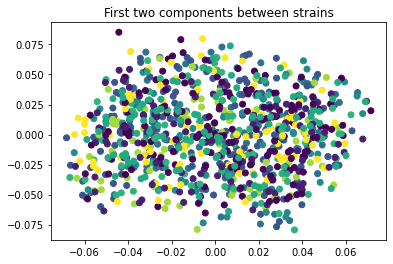

In [233]:
#plot the dataframe
fig, ax = plt.subplots()
ax.scatter(x = eigenvec_df[2], y = eigenvec_df[3], c = eigenvec_df["color"])
ax.title.set_text("First two components between strains")
plt.show()

## Question 2

In [208]:
%%bash
plink --vcf /Users/cmdb/Desktop/week3_hw/BYxRM_segs_saccer3.bam.simplified.vcf --allow-extra-chr --freq

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --freq
  --vcf /Users/cmdb/Desktop/week3_hw/BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%

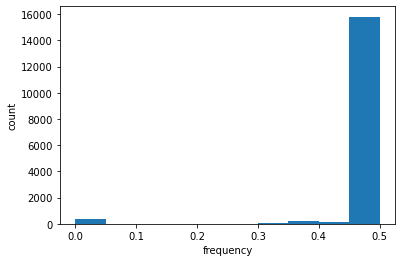

In [217]:
freq_df = pd.read_csv("/Users/cmdb/qbb2020-answers/week3_hw/plink.frq", sep="\s+")
freq = freq_df["MAF"]

fig, ax = plt.subplots()
ax.hist(freq, bins = 10)
plt.xlabel("frequency")
plt.ylabel("count")
plt.show()


## Question 3

In [134]:
#fix the BYxRM_PhenoData.txt file
phenotype_df = pd.read_csv("/Users/cmdb/Desktop/week3_hw/BYxRM_PhenoData.txt", sep="\t", keep_default_na=False, na_values=['NULL'])
phenotype_val_df = phenotype_df.iloc[:, 1:]
FID = []
SID = []
for i in phenotype_df.iloc[:, 0]:
    temp_split = re.split("_", i)
    FID.append(temp_split[0])
    SID.append(temp_split[1])
ID_df = pd.DataFrame({"FID": FID, "IID": SID})
final_phenotype_df = pd.concat([ID_df, phenotype_val_df], axis=1, sort=False)
final_phenotype_df.to_csv('/Users/cmdb/Desktop/week3_hw/final_BYxRM_PhenoData.txt', index=None, sep='\t')

In [135]:
%%bash
plink \
  --vcf /Users/cmdb/Desktop/week3_hw/BYxRM_segs_saccer3.bam.simplified.vcf \
  --allow-extra-chr \
  --pca \
  --mind

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --mind
  --pca
  --vcf /Users/cmdb/Desktop/week3_hw/BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%

In [322]:
%%bash
plink \
  --vcf /Users/cmdb/Desktop/week3_hw/BYxRM_segs_saccer3.bam.simplified.vcf \
  --pheno /Users/cmdb/Desktop/week3_hw/final_BYxRM_PhenoData.txt \
  --all-pheno \
  --allow-extra-chr \
  --linear \
  --allow-no-sex \
  --covar plink.eigenvec \
  --covar-number 1-10

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-extra-chr
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno /Users/cmdb/Desktop/week3_hw/final_BYxRM_PhenoData.txt
  --vcf /Users/cmdb/Desktop/week3_hw/BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
799 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders present.
Cal

## Question 5

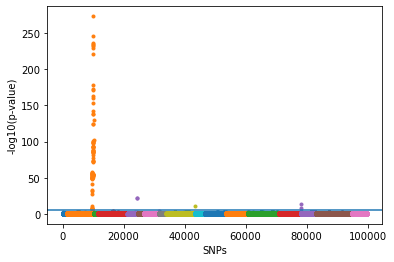

In [188]:
import matplotlib.pyplot as plt
import math
def manhattan_plot(assoc_file):
    gwas = pd.read_csv(assoc_file, sep = "\s+")
    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))
    chromosome = gwas.CHR.unique().tolist()
    
    gwas['snp_index'] = range(len(gwas))
    fig, ax = plt.subplots()
    for chr in chromosome:
        ax.scatter(gwas["snp_index"][gwas["CHR"] == chr], gwas["logP"][gwas["CHR"] == chr], marker = '.')
    #every point above the horizontal line has a p-value smaller than 10^-5
    plt.axhline(y = 5)
    plt.xlabel("SNPs")
    plt.ylabel("-log10(p-value)")
    plt.show()

In [240]:
def qqplot(assoc_file):
    gwas = pd.read_csv(assoc_file, sep = "\s+")
    gwas['logP'] = -1 * np.log10(gwas['P'])
    
    gwas_sorted = gwas.sort_values(by = "P")
    gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
    gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
    gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])
    gwas['snp_index'] = range(len(gwas))
    
    fig, ax = plt.subplots()
    ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    ax.plot([8,0], [8, 0], color = "black")
    
    plt.xlim([0, 8])
    plt.ylim([0, 10])
    plt.xlabel("Expected -log10(p-value)")
    plt.ylabel("Observed -log10(p-value)")
    plt.show()

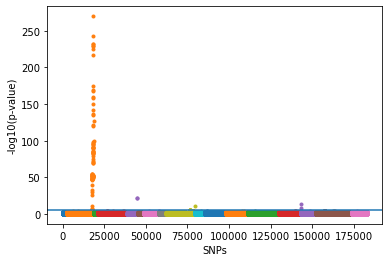

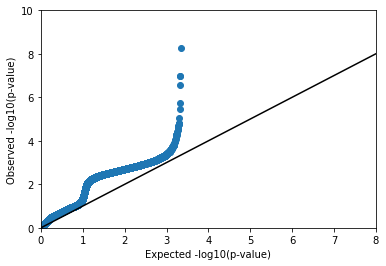

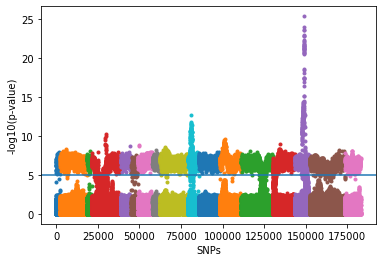

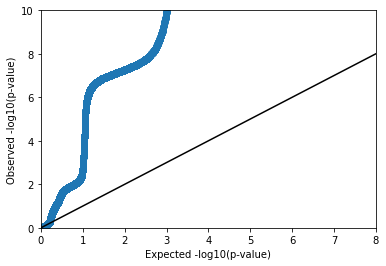

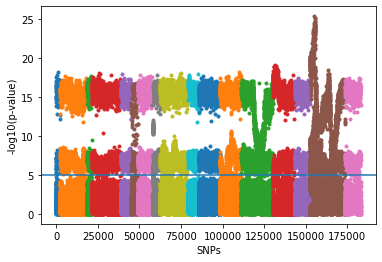

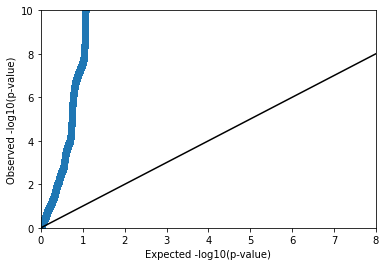

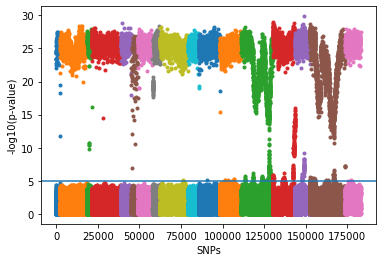

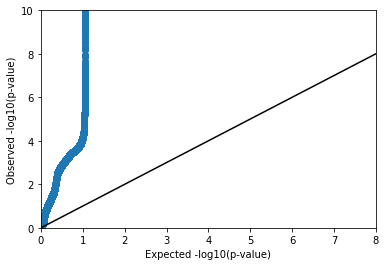

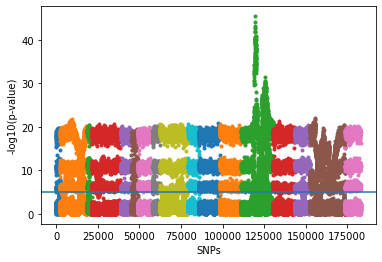

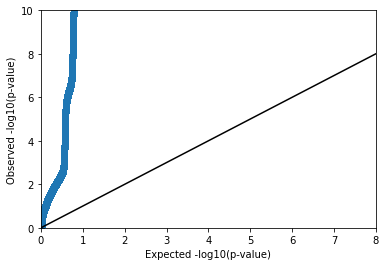

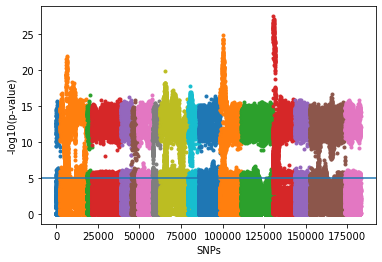

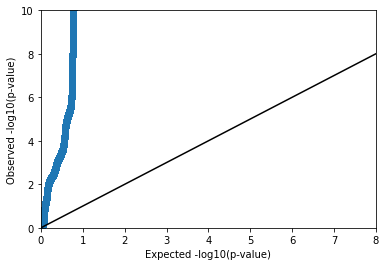

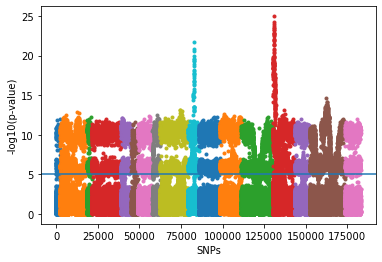

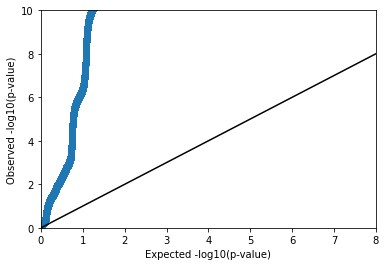

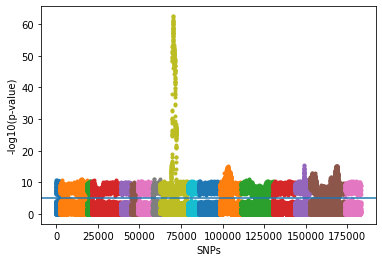

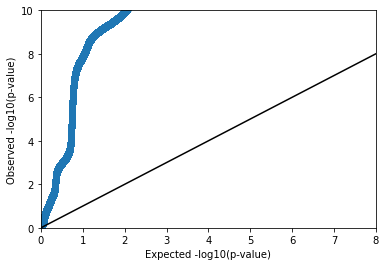

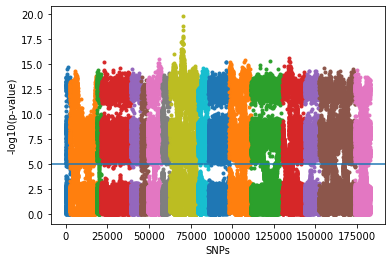

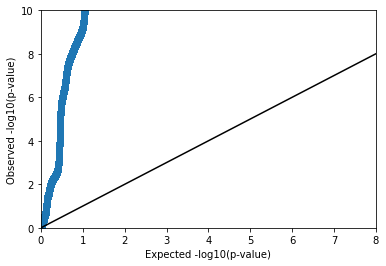

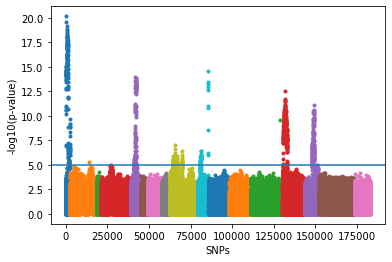

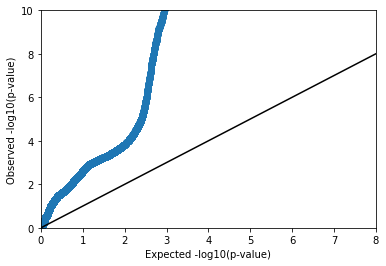

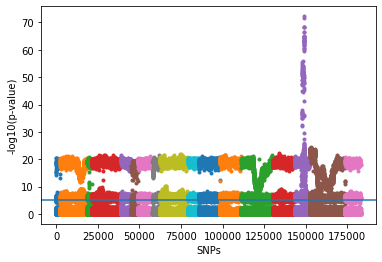

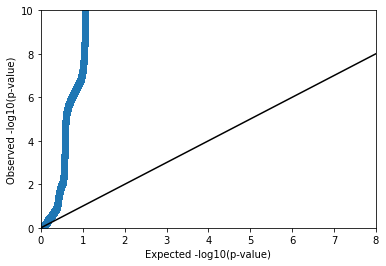

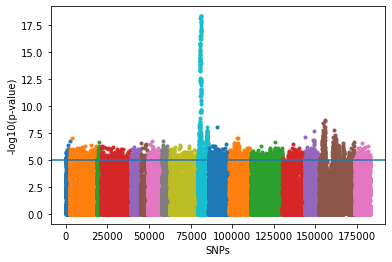

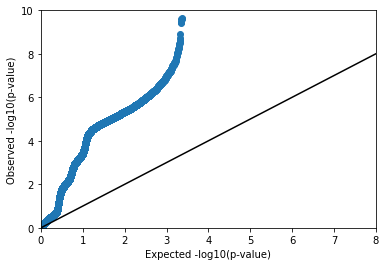

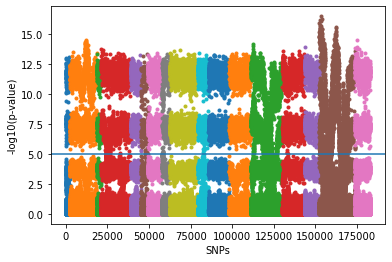

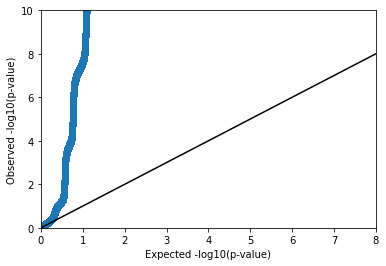

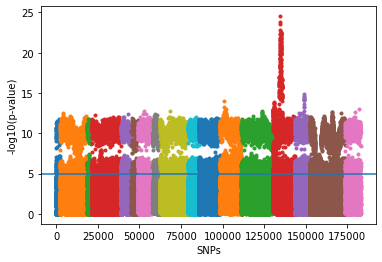

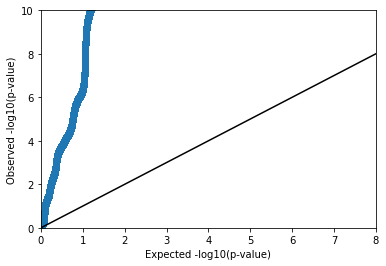

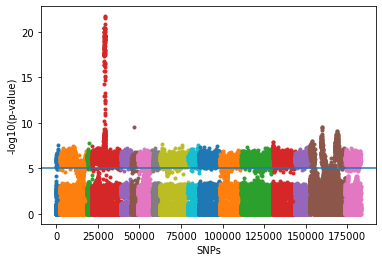

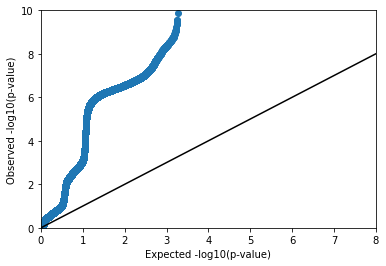

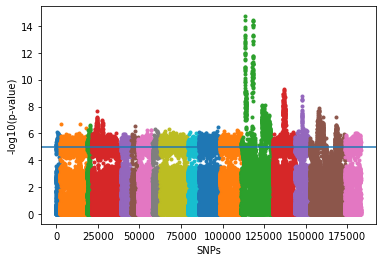

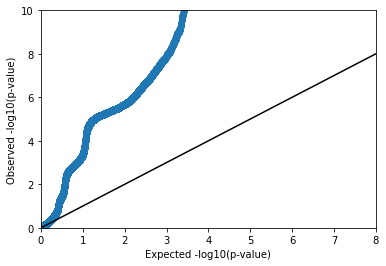

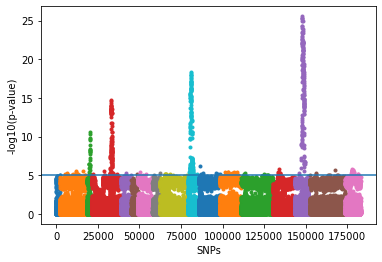

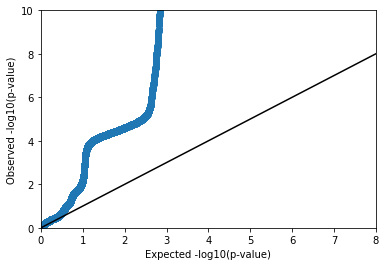

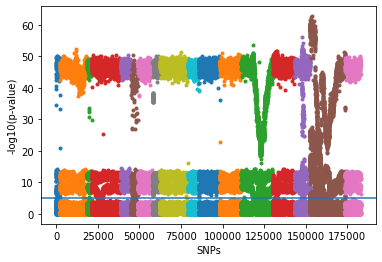

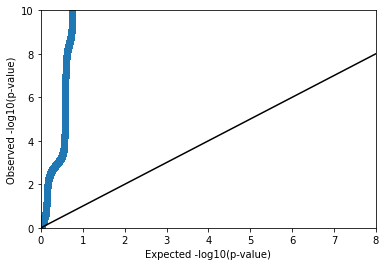

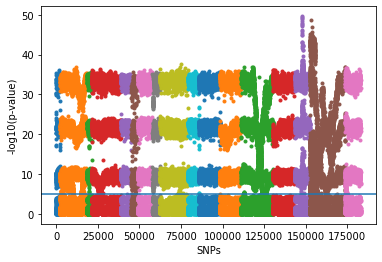

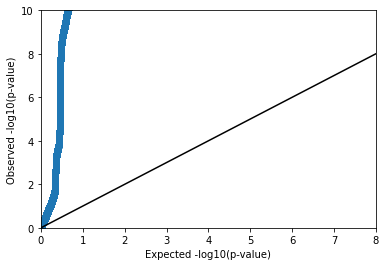

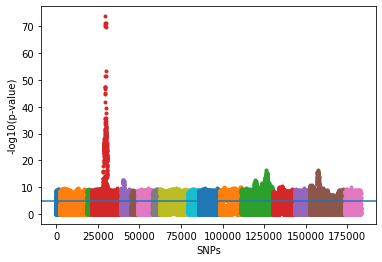

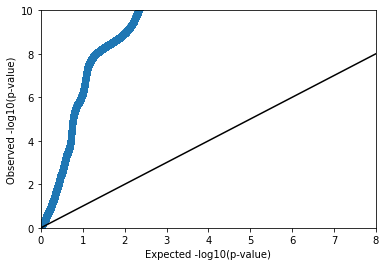

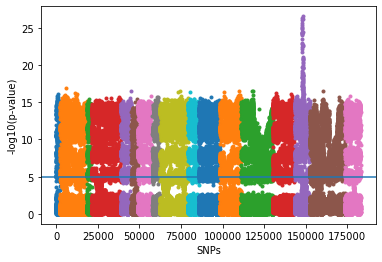

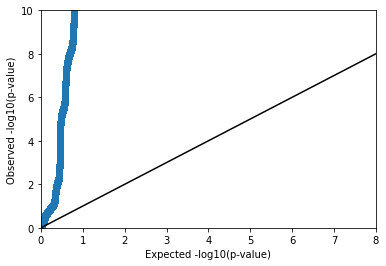

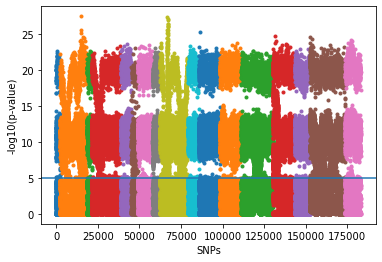

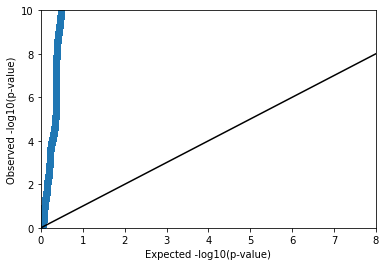

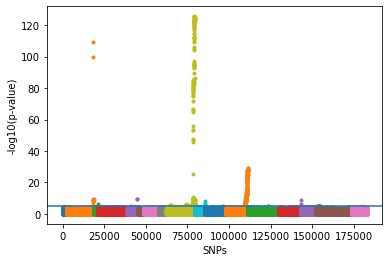

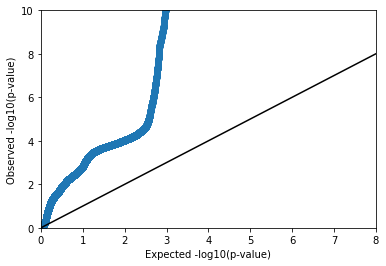

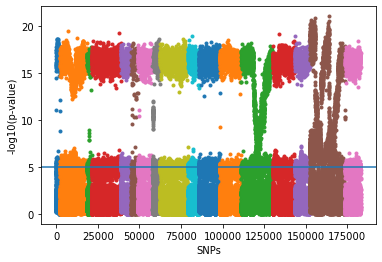

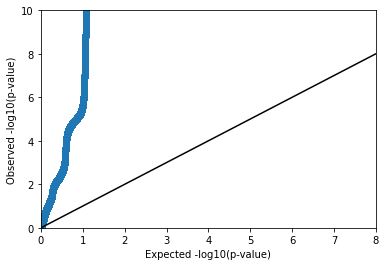

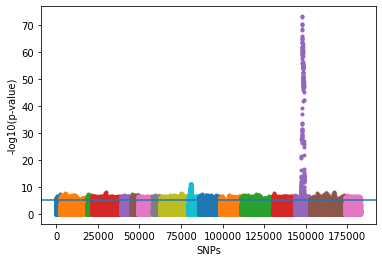

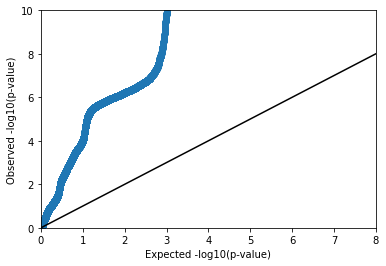

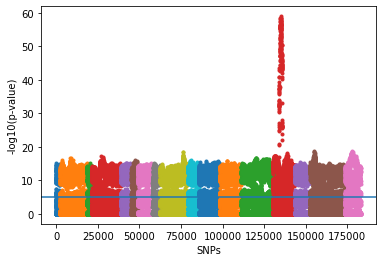

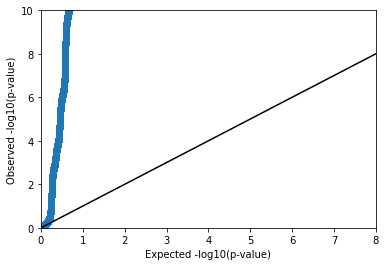

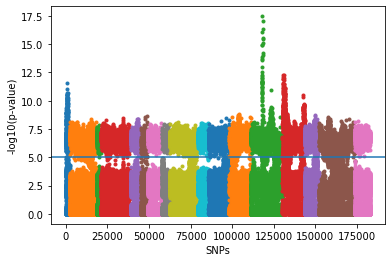

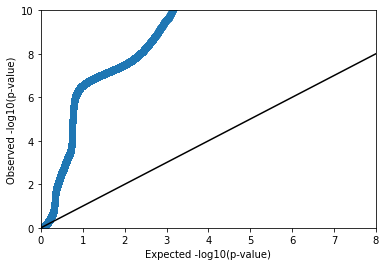

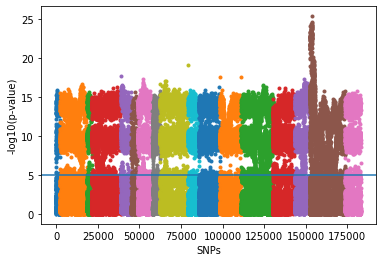

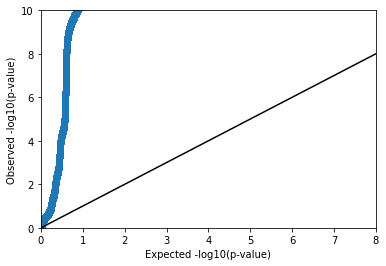

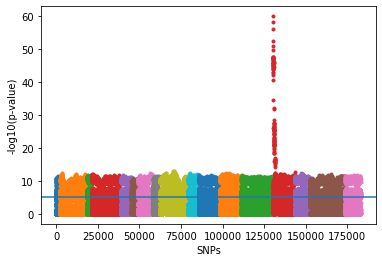

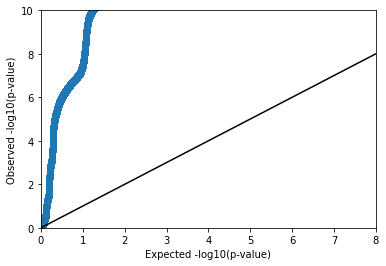

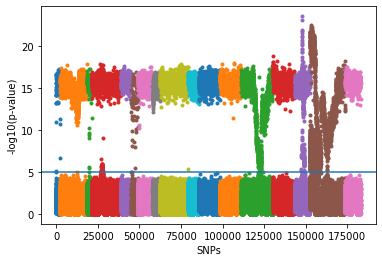

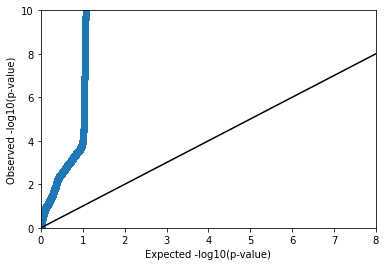

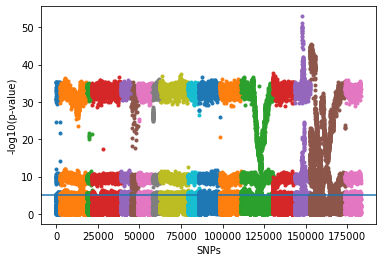

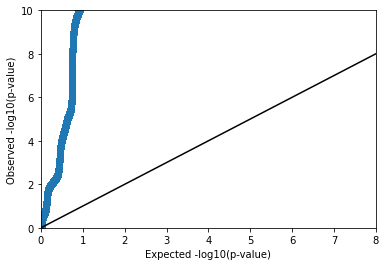

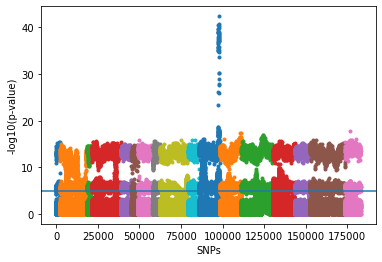

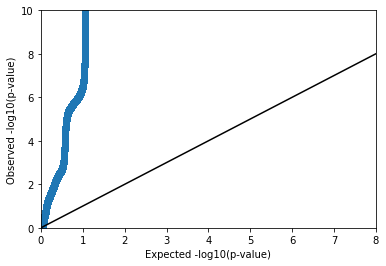

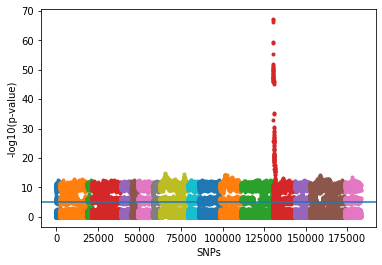

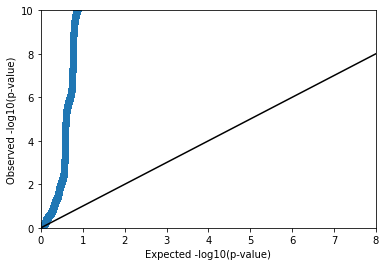

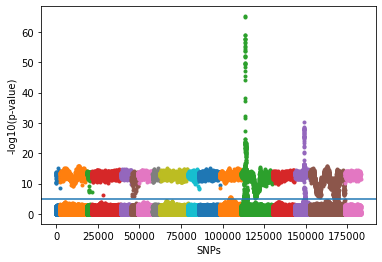

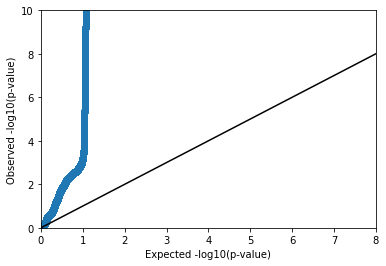

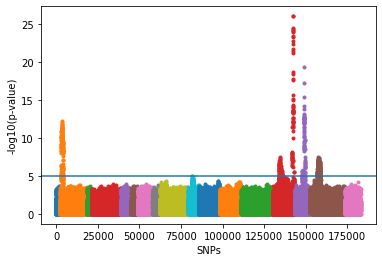

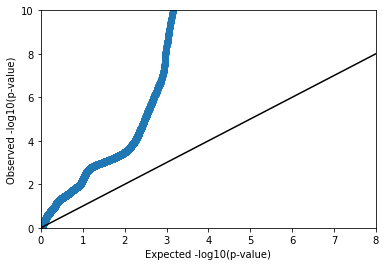

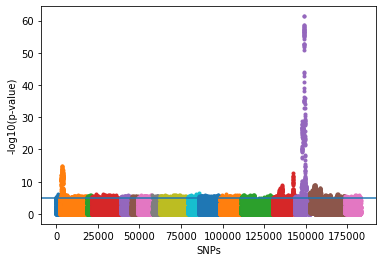

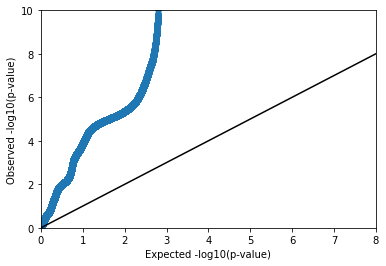

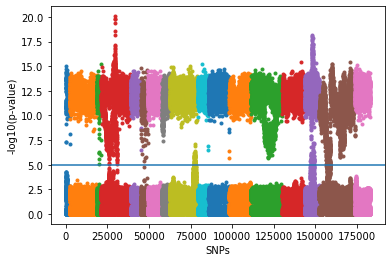

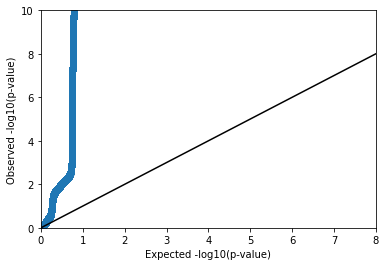

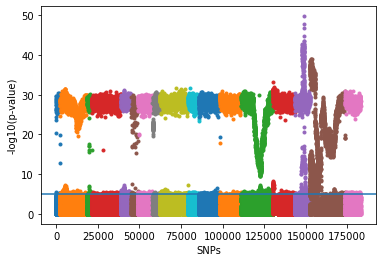

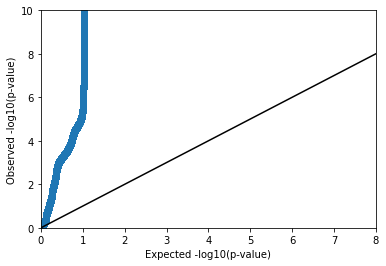

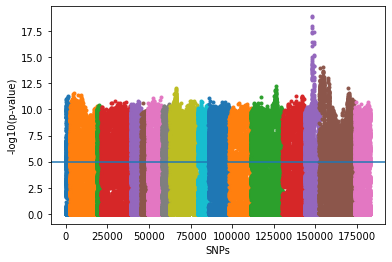

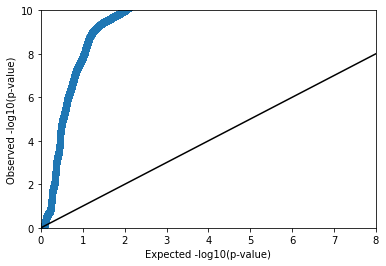

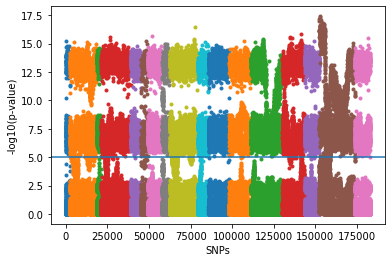

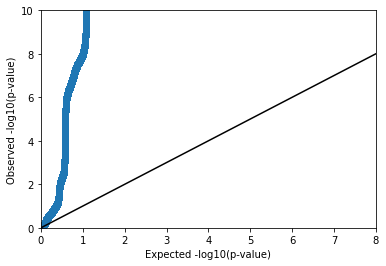

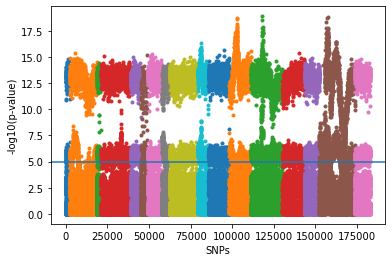

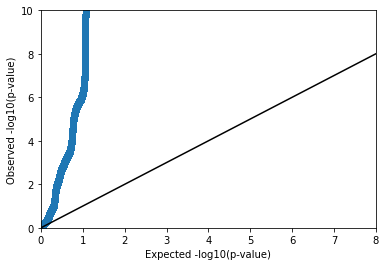

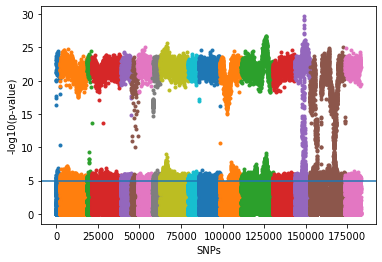

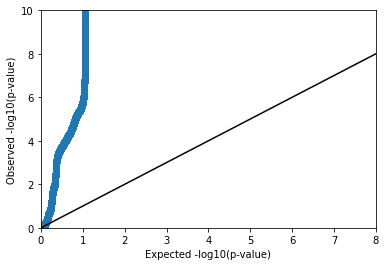

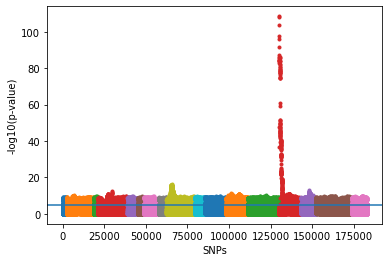

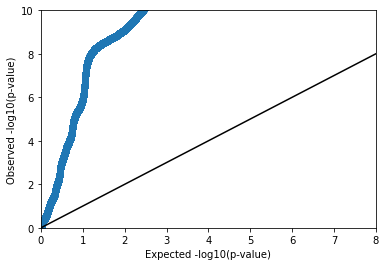

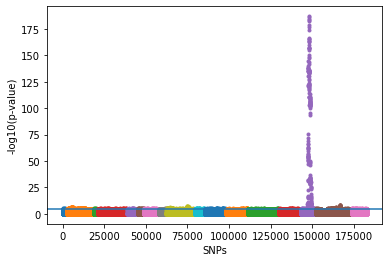

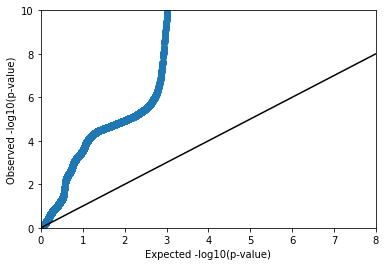

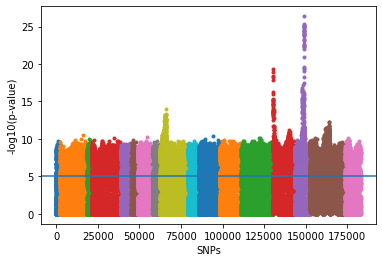

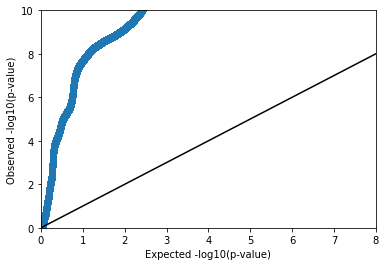

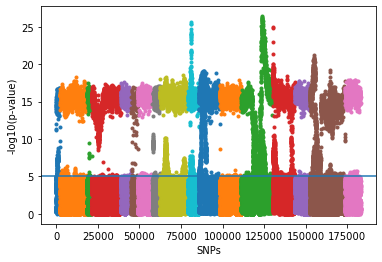

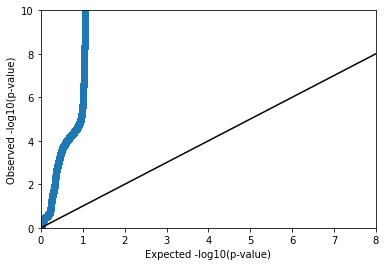

In [323]:
compound_df = pd.read_csv("/Users/cmdb/Desktop/week3_hw/final_BYxRM_PhenoData.txt", sep = "\t", index_col = None)
compound_list = compound_df.columns.values.tolist()
compound_list = compound_list[2:]
for compound in compound_list:
    manhattan_plot("/Users/cmdb/qbb2020-answers/week3_hw/plink." + compound + ".assoc.linear")
    qqplot("/Users/cmdb/qbb2020-answers/week3_hw/plink." + compound + ".assoc.linear")

## Question 6

In [340]:
phenotype_df = pd.read_csv("/Users/cmdb/Desktop/week3_hw/final_BYxRM_PhenoData.txt", sep="\t")
assoc = phenotype_df.loc[506].values[2:]

array([-6.7258540322735, 0.247656329796101, 0.42855308990379704,
       0.12068618799303, 2.84930759816419, -6.25275166779575,
       0.9359046848629481, 0.7397402574205799, -1.69219160835601,
       -4.45063420499526, 3.01089297105326, -0.786067595794376,
       -0.17542152943867198, -1.8542682416421001, -1.2201957154675802,
       -0.520392536571186, 0.689777135784843, 2.5076997687827203,
       2.13440090706372, 4.00533848522831, 0.68944923768464,
       -1.03416664293496, 0.29908645325737104, 1.2655714491208898,
       -0.817179604042438, -12.430409454714198, 0.366803742606967,
       -0.574709479619952, -0.64942012140049, nan, 0.968202662711409,
       -0.820647921579511, -2.4824918298378598, 0.129502437963114,
       2.13667214511401, 3.34575026926448, 0.8182481216710341,
       0.989361652957692, 15.7202239384529, 0.671881193392922,
       0.882555121404109, 23.3973376421389, 1.83775972758347,
       -3.23324599265249, 1.44384502595338, -6.156624478908349],
      dtype=object)

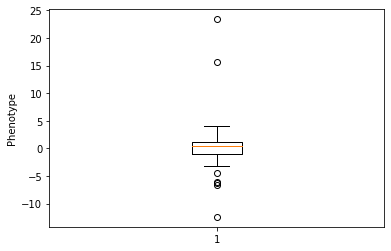

In [341]:
fig, ax = plt.subplots()
ax.boxplot(assoc)
plt.ylabel("Phenotype")
plt.show()